In [ ]:
import pandas as pd
import numpy as np
import os
import pickle

# Lab 1- Spessis detection

In [ ]:
df = pd.read_csv('X_train_no_poly.csv')  

In [ ]:
df.shape

(5660, 77)

In [ ]:
df.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def poly_transformation(df):
  degree = 2
  polynomialFeatures = PolynomialFeatures(degree)
  X_transformed = polynomialFeatures.fit_transform(df)
  X_transformed = np.append(X_transformed, df, axis=1)
  print(f'The polynomial feature engneering added {X_transformed.shape[1]-df.shape[1]} features')
  return X_transformed

In [ ]:
df_train = df.sample(frac= 0.75, random_state = 42)
df_test = df.sample(frac= 0.25, random_state = 42)


In [ ]:
df_train.shape

(4245, 78)

In [ ]:
np.all(np.isfinite(df))

True

In [ ]:
# df_train = poly_transformation(df_train)
# df_test = poly_transformation(df_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
def down_sampling(df):
  columns = df.columns
  feature_names = columns[:-1]
  target_name = columns[-1]
  X, y = (RandomUnderSampler(sampling_strategy=1/3, random_state=42)
        .fit_resample(df.drop(target_name, axis=1), df[target_name]))

  rus_df = pd.DataFrame(np.concatenate((X, y[:, None]), axis=1),
                        columns=list(feature_names) + [target_name])
  print('# Data:', len(rus_df))
  print('% Undersampled + Dropped NA / Original:', 100 * len(rus_df) / len(df))
  print('% Positive target:', rus_df[target_name].mean() * 100)
  return rus_df

In [ ]:
# df = down_sampling(df)

# Data: 2964
% Undersampled + Dropped NA / Original: 29.64
% Positive target: 25.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


##Training models

In [ ]:
import pandas as pd
import random
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import PolynomialFeatures
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import recall_score, precision_score

Roc graph plot

In [ ]:
def plots(Y):
    y_test1, y_pred1, y_test2, y_pred2, y_test3, y_pred3, y_test4, y_pred4, y_test5, y_pred5= Y
    plt.figure(0).clf()

    # SVM
    fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred1)
    auc = round(metrics.roc_auc_score(y_test1, y_pred1), 4)
    plt.plot(fpr, tpr, label="SVM, AUC=" + str(auc))

    # Decision Tree
    fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred2)
    auc = round(metrics.roc_auc_score(y_test2, y_pred2), 4)
    plt.plot(fpr, tpr, label="Decision Tree, AUC=" + str(auc))

    # Random Forest
    fpr, tpr, _ = metrics.roc_curve(y_test3, y_pred3)
    auc = round(metrics.roc_auc_score(y_test3, y_pred3), 4)
    plt.plot(fpr, tpr, label="Random Forest, AUC=" + str(auc))

    # Gradient Boosting
    fpr, tpr, _ = metrics.roc_curve(y_test4, y_pred4)
    auc = round(metrics.roc_auc_score(y_test4, y_pred4), 4)
    plt.plot(fpr, tpr, label="Gradient Boosting, AUC=" + str(auc))

    # Ensembled model 
    fpr, tpr, _ = metrics.roc_curve(y_test5, y_pred5)
    auc = round(metrics.roc_auc_score(y_test5, y_pred5), 4)
    plt.plot(fpr, tpr, label="Ensembled model, AUC=" + str(auc))

    # Legend
    plt.legend()
    plt.title('ROC Curve')
    plt.savefig('output3.jpg')
    plt.show()


In [ ]:
seed = 42
random.seed(42)
# train_prep = time.time()
# X_train, y_train = preprocess('train')
X_train = pd.read_csv('X_train_no_poly.csv') 
y_train = pd.read_csv('y_train.csv') 
# down sampling
# X_train = poly_transformation(X_train)

# X_train = pd.read_csv('X_train.csv')
# y_train = pd.read_csv('y_train.csv')
# X_train.to_csv('X_train.csv')
# y_train.to_csv('y_train.csv')
models = [(SVC(random_state=42), 'SVM'), (DecisionTreeClassifier(random_state=42), 'Decision Tree'),
          (RandomForestClassifier(n_estimators=300, random_state=42), 'Random Forest'),
          (GradientBoostingClassifier(n_estimators=500, random_state=42), 'Gradient Boosting')]
X_test =  pd.read_csv('X_test_no_poly.csv')
y_test = pd.read_csv('y_test.csv')

# down sampling
# X_test = poly_transformation(X_test)



In [ ]:
# only in case that you read the new CSV to ignore the id column
X_test = X_test.iloc[:,1:]
X_train = X_train.iloc[:,1:]
y_train = y_train.iloc[:,1]
y_test = y_test.iloc[:,1]

In [ ]:
# X_train = poly_transformation(X_train)


The polynomial feature engneering added 3003 features


In [ ]:
# X_test = poly_transformation(X_test)


The polynomial feature engneering added 3003 features


### Train models

train preprocess time: 3.5762786865234375e-06
SVM - F1 score is:0.6112469437652812
SVM - recall score is:0.5060728744939271
SVM - precision score is:0.7716049382716049
train preprocess time: 3.0994415283203125e-06
Decision Tree - F1 score is:0.39376893119861534
Decision Tree - recall score is:0.6140350877192983
Decision Tree - precision score is:0.2898089171974522
train preprocess time: 6.4373016357421875e-06
Random Forest - F1 score is:0.6853352984524688
Random Forest - recall score is:0.6275303643724697
Random Forest - precision score is:0.7548701298701299
train preprocess time: 3.0994415283203125e-06
Gradient Boosting - F1 score is:0.6613946800862689
Gradient Boosting - recall score is:0.6207827260458839
Gradient Boosting - precision score is:0.7076923076923077
Ensembled - F1 score is:0.6873580620741863
Ensembled - recall score is:0.6126855600539811
Ensembled - precision score is:0.7827586206896552


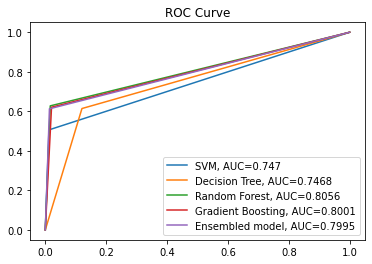

Total time: 77.30935978889465


In [ ]:
seed = 42
random.seed(42)
train_prep = time.time()
Y = []
models_Y = []
for model, model_name in models:
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)
    pickle.dump(clf, open(model_name, 'wb'))
    test_prep = time.time()
    # X_test = pd.read_csv('X_test.csv')
    # y_test = pd.read_csv('y_test.csv')
    print(f'train preprocess time: {time.time() - test_prep}')

    # X_train.to_csv('X_test.csv')
    # y_train.to_csv('y_test.csv')
    y_pred = clf.predict(X_test)
    print(f'{model_name} - F1 score is:{f1_score(y_test, y_pred)}')
    print(f'{model_name} - recall score is:{recall_score(y_test, y_pred)}')
    print(f'{model_name} - precision score is:{precision_score(y_test, y_pred)}')

    target_names = ['class 0', 'class 1']
    # print(classification_report(y_test, y_pred, target_names=target_names))
    Y.append(y_test)
    Y.append(y_pred)
    models_Y.append(y_pred)
models_df = pd.DataFrame()
m_models = ['SVM', 'Decision Tree',
          'Random Forest','Gradient Boosting']
for i, model_res in enumerate(models_Y):
  model_res = np.array(model_res)
  models_df[m_models[i]] = model_res
models_df.drop(['Decision Tree'], axis =1, inplace =True)
y_pred_new = [1 if np.sum(row) >= 2 else 0 for row in models_df.values]
print(f'Ensembled - F1 score is:{f1_score(y_test, y_pred_new)}')
print(f'Ensembled - recall score is:{recall_score(y_test, y_pred_new)}')
print(f'Ensembled - precision score is:{precision_score(y_test, y_pred_new)}')

Y.append(y_test)
Y.append(y_pred_new)
plots(Y)
print(f'Total time: {time.time() - train_prep}')

###script for predict.py

In [ ]:
   #Script
    # Parsing script arguments
    # parser = argparse.ArgumentParser(description='Process input')
    # parser.add_argument('input_folder', type=str, help='Input folder path, containing images')
    # args = parser.parse_args()
    # X, y = preprocessing(test, args.input_folder)
    # models_names = ['SVM','Random Forest', 'Gradient Boosting']
    # predictions = []
    # models_dataframe = pd.Dataframe()
    # for model_name in models_names:
    #   clf = pickle.load(open(model_name, 'rb'))
    #   y_pred = clf.predict(X)
    #   predictions.append(y_pred)
    # for prediction in enumerate(predictions):
    #   model_res = np.array(model_res)
    #   models_dataframe[m_models[i]] = model_res
    # y_pred_new = [1 if np.sum(row) >= 2 else 0 for row in models_dataframe.values]
    # final_df['id'] = X.index.values
    # final_df['SepsisLabel'] = np.array(y_pred_new)
    # final_df.to_csv('prediction.csv')

## MLP and XGBoost tries (did not provide better results)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1000, 200), random_state=42)

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 200), random_state=42,
              solver='lbfgs')

In [ ]:
new_preds = clf.predict(X_test)

In [ ]:
print(f'Ensembled - F1 score is:{f1_score(y_test, new_preds)}')

Ensembled - F1 score is:0.4923913043478261


In [ ]:
# from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# X_train_n, y_train_n = make_hastie_10_2(random_state=0)

In [ ]:
# X_test, y_test = make_hastie_10_2(random_state=0)

In [ ]:
# X_train.shape

(12000, 10)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(f'XGboost - F1 score is:{f1_score(y_test, preds)}')

XGboost - F1 score is:0.6472184531886024


In [ ]:
models_df.sum()

Random Forest        613.0
Gradient Boosting    650.0
Ensembled            733.0
dtype: float64

In [ ]:
models_df['XGBoost'] = np.array(preds)

In [ ]:
models_df.drop(['SVM'], axis = 1, inplace= True)